## 네트워크 학습시키기

네트워크 입력: (데이터 개수, 이미지 크기 x, 이미지 크기 y, 채널 수)
    ex) input_shape=(28,28,1)

In [9]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data() 

x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [7]:
print(x_train.shape)

# (60000, 28, 28, 1) 로 만드어 주기 위해 reshape, 이때 채널수 1은 흑백 이미지 의미, 컬러의 경우 r,g,b 3 

(60000, 28, 28)


In [10]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [11]:
# x_train  학습데이터로 딥러닝 네트워크 학습. epochs = 10 : 전체 60,000개의 데이터를 10번 반복 사용해서 학습 

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2011 - accuracy: 0.9396
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0673 - accuracy: 0.9792
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0494 - accuracy: 0.9847
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0391 - accuracy: 0.9872
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0321 - accuracy: 0.9898
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0269 - accuracy: 0.9913
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0216 - accuracy: 0.9926
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0185 - accuracy: 0.9937
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0145 - accuracy: 0.9953
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.012

### 테스트 데이터로 성능 확인
- x_test 이용

In [12]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 1s - loss: 0.0310 - accuracy: 0.9902
test_loss: 0.030999736860394478 
test_accuracy: 0.9901999831199646


### 잘못 추론한 데이터 확인
- model.evaluate() 대신 model.predict()를 사용하면 model이 입력값을 보고 실제로 추론한 확률분포를 출력할 수 있다. 
- model이란 사실 10개의 숫자 중 어느 것일지에 대한 확률값을 출력하는 함수이다.
- 이 함수의 출력값 즉 확률값이 가장 높은 숫자가 바로 model이 추론한 숫자가 된다.

In [13]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [5.9715299e-10 1.6327403e-10 3.7651592e-08 1.9460566e-09 3.3555314e-10
 1.3567653e-11 1.3187392e-15 1.0000000e+00 2.9320164e-09 1.2343191e-08]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


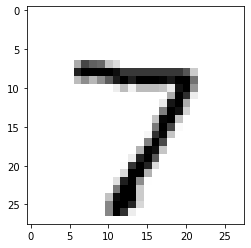

In [14]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [1.3023574e-10 7.3063611e-10 1.6041330e-08 8.1469666e-04 1.0603652e-10
 1.4593744e-01 3.2301692e-12 3.7143122e-10 1.1033905e-01 7.4290872e-01]
라벨: 5, 예측결과: 9


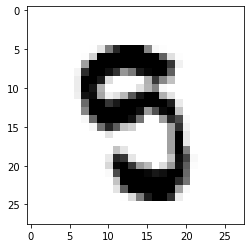

예측확률분포: [3.8977814e-01 2.3112139e-05 9.1076618e-06 5.2648250e-08 1.8014272e-06
 9.9907082e-04 5.0398789e-06 1.8411173e-06 6.0730124e-01 1.8806029e-03]
라벨: 0, 예측결과: 8


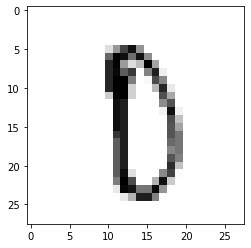

예측확률분포: [6.1798971e-03 2.7051167e-06 8.3124243e-02 6.6127276e-10 7.6487553e-01
 3.4002094e-06 5.0697825e-04 2.0008504e-06 3.0099033e-04 1.4500424e-01]
라벨: 9, 예측결과: 4


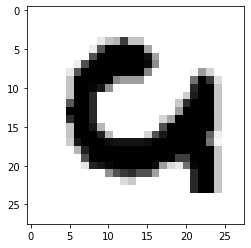

예측확률분포: [9.7799486e-01 1.5816754e-08 2.5235784e-05 4.1055596e-08 2.2442182e-06
 8.7535889e-05 2.5887252e-09 6.7952620e-03 5.2715327e-06 1.5089590e-02]
라벨: 9, 예측결과: 0


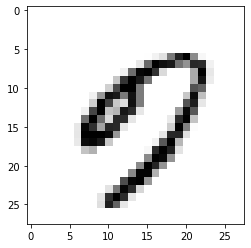

예측확률분포: [6.1673236e-12 2.8068698e-06 4.0474088e-06 3.2770284e-08 9.2482585e-01
 3.5422488e-06 1.4350389e-09 1.5578567e-05 7.4551448e-02 5.9675914e-04]
라벨: 9, 예측결과: 4


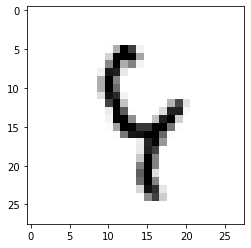

In [15]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

### 더 좋은 네트워크 만들기
- 하이퍼파라미터 바꾸기
    - Conv2D 레이어 입력 이미지 특징 수 변경
    - Dense 레이어 뉴런 수 변경
    - 학습 반복 횟수 epoch 값 변경

In [16]:
#바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               